In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [3]:
data= pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')

In [4]:
data.head(5)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [5]:
data.tail(5)

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [6]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [8]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [9]:
data.head(5)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [10]:
gender= LabelEncoder()
data['Gender']= gender.fit_transform(data['Gender'])

In [11]:
data.head(5)

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [ ]:
bins = (-1,0,1,2,3,4,5)
health=['malnourished','underweight','fit','slightly overweight','overweight','extremly overweight']
data['Index']=pd.cut(data['Index'],bins=bins,labels= health)

In [17]:
data.head(6)

,Gender,Height,Weight,Index
0,1,174,96,overweight
1,1,189,87,fit
2,0,185,110,overweight
3,0,195,104,slightly overweight
4,1,149,61,slightly overweight
5,1,189,104,slightly overweight


In [19]:
data['Index'].value_counts()

extremly overweight    198
overweight             130
fit                     69
slightly overweight     68
underweight             22
malnourished            13
Name: Index, dtype: int64

In [20]:
data['Gender'].value_counts()

0    255
1    245
Name: Gender, dtype: int64

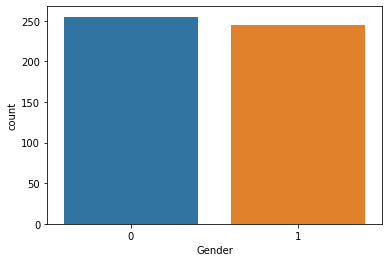

In [21]:
sns.countplot(data['Gender'])

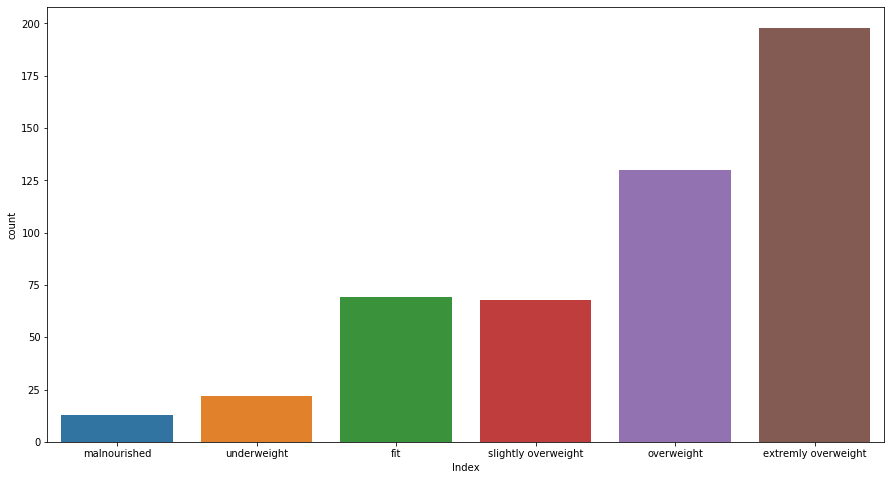

In [38]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,8))
sns.countplot(data['Index'])

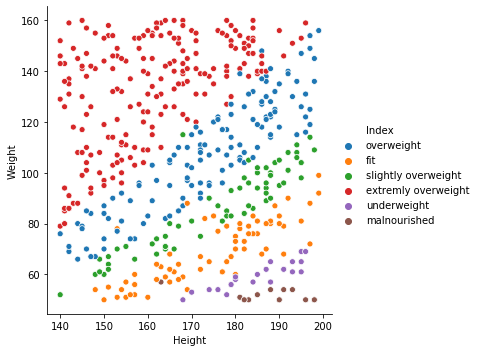

In [27]:
sns.relplot(x='Height',y='Weight',hue='Index',data=data)

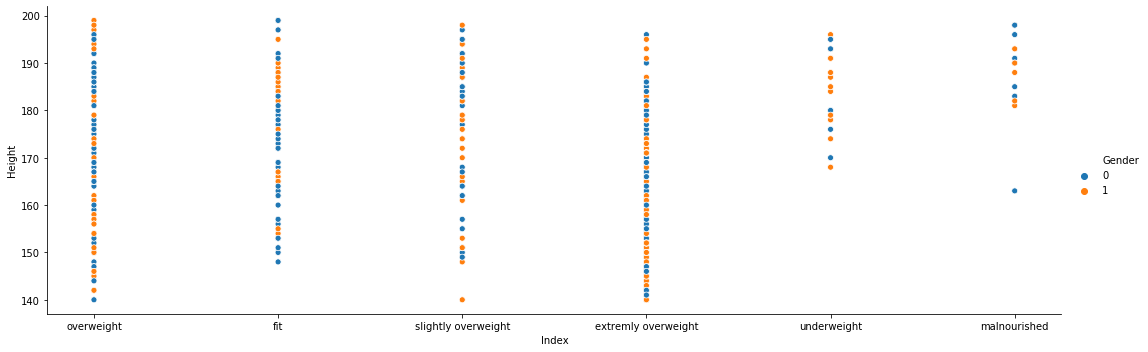

In [29]:
sns.relplot(x='Index',y='Height',hue='Gender',data=data,height=5, aspect=3)

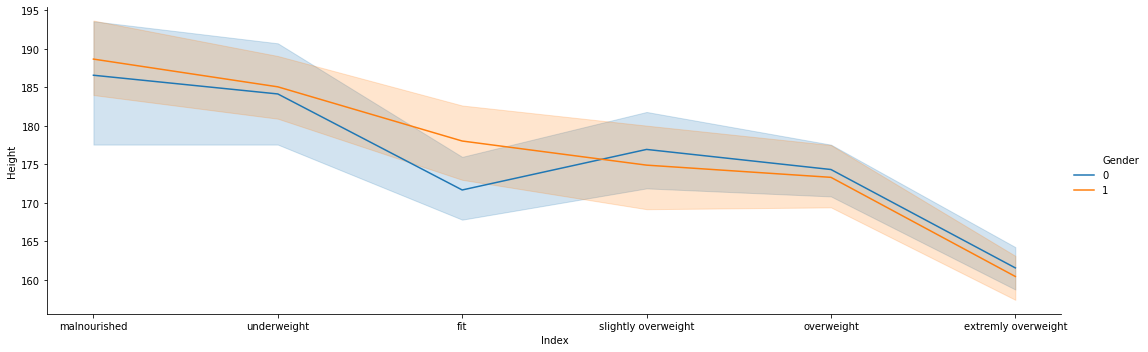

In [41]:
sns.relplot(x='Index',y='Height',hue='Gender',kind='line',data=data,height=5, aspect=3)

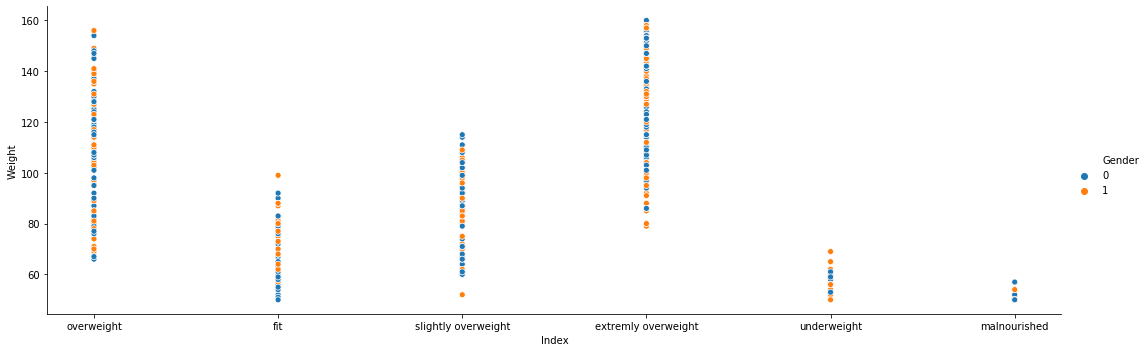

In [34]:
sns.relplot(x='Index',y='Weight',hue='Gender',data=data,height=5, aspect=3)

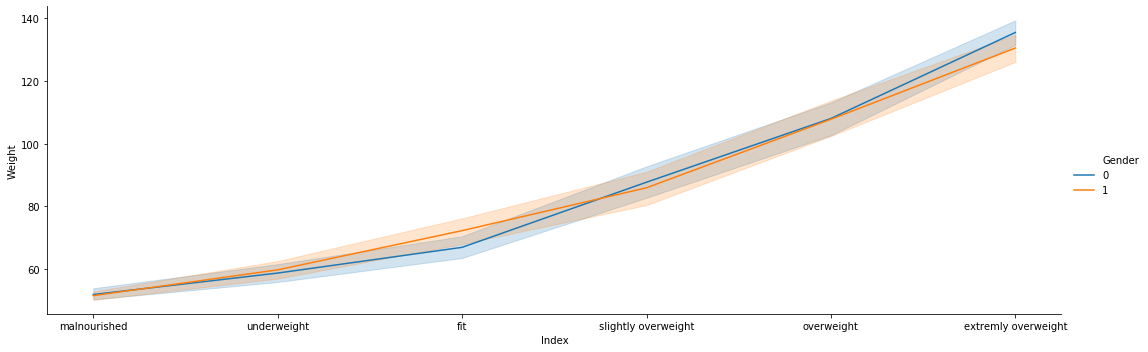

In [39]:
sns.relplot(x='Index',y='Weight',hue='Gender',kind='line',data=data,height=5, aspect=3)

# Predicting Outcome With Support Vector Machine

In [43]:
X= data.drop('Index',axis=1)
y=data['Index']

In [44]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [45]:
s= StandardScaler()
X_train=s.fit_transform(X_train)
X_test= s.transform(X_test)

In [46]:
clf= svm.SVC()
clf.fit(X_train,y_train)
pred=clf.predict(X_test)

In [47]:
print(classification_report(y_test,pred))

                     precision    recall  f1-score   support

extremly overweight       0.88      0.97      0.92        36
                fit       0.73      0.80      0.76        10
       malnourished       0.00      0.00      0.00         3
         overweight       0.96      0.78      0.86        32
slightly overweight       0.78      0.93      0.85        15
        underweight       0.60      0.75      0.67         4

           accuracy                           0.85       100
          macro avg       0.66      0.71      0.68       100
       weighted avg       0.84      0.85      0.84       100



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
print(confusion_matrix(y_test,pred))

[[35  0  0  1  0  0]
 [ 0  8  0  0  2  0]
 [ 0  1  0  0  0  2]
 [ 5  0  0 25  2  0]
 [ 0  1  0  0 14  0]
 [ 0  1  0  0  0  3]]


In [49]:
print(accuracy_score(y_test,pred))

0.85


In [50]:
a=[[0,160,48]]
a=s.transform(a)
b=clf.predict(a)

In [51]:
b

array(['fit'], dtype=object)